<a href="https://colab.research.google.com/github/rizalhakikal/phython-based-remote-sensing-application-project/blob/main/phython_based_remote_sensing_application_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebaran SPL Selat Bali

# Sebaran SPL Selat Bali

In [ ]:
#Google drive mounting
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pathsuhu = "/content/drive/MyDrive/Praktikum APK Inderaja/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1713574032407.nc"
pathsuhu

'/content/drive/MyDrive/Praktikum APK Inderaja/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1713574032407.nc'

In [ ]:
#import modules
import xarray as xr #manipulasi data netcdf
import matplotlib.pyplot as plt


In [ ]:
dset = xr.open_dataset (pathsuhu)
display(dset)

<xarray.Dataset>
Dimensions:       (time: 366, latitude: 16, longitude: 19)
Coordinates:
  * latitude      (latitude) float32 -9.075 -9.025 -8.975 ... -8.375 -8.325
  * longitude     (longitude) float32 114.3 114.3 114.4 ... 115.1 115.1 115.2
  * time          (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2024-01-01
Data variables:
    analysed_sst  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    comment:           WARNING Some applications are unable to properly handl...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    institution:       UKMO
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-04-20T00:47:12.425Z
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...

In [ ]:
pip install pandas

In [ ]:
from pandas import Series
from pandas import date_range
from pandas import DataFrame

from datetime import datetime, timedelta
import pandas as pd


In [ ]:
limonth = pd.date_range(start='2023-01-01 00:00', periods= 12, freq='1M')
display(limonth)

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
from datetime import datetime,timedelta
import pandas as pd

limonth = pd.date_range(start='2023-01-01 00:00', periods= 12, freq='1M')
list_month = [m.strftime('%B') for m in limonth]

list_month


['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
dset_bulan = dset.groupby('time.month').mean()
dset_bulan

<xarray.Dataset>
Dimensions:       (month: 12, latitude: 16, longitude: 19)
Coordinates:
  * latitude      (latitude) float32 -9.075 -9.025 -8.975 ... -8.375 -8.325
  * longitude     (longitude) float32 114.3 114.3 114.4 ... 115.1 115.1 115.2
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst  (month, latitude, longitude) float32 301.9 301.9 ... nan nan
Attributes:
    Conventions:       CF-1.11
    comment:           WARNING Some applications are unable to properly handl...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    institution:       UKMO
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-04-20T00:47:12.425Z
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...

In [ ]:
def kelvinToCelcius(kelvin):
 return kelvin - 273.15

kelvin = dset.analysed_sst
sst_celcius = kelvinToCelcius(kelvin)

sst_celcius

<xarray.DataArray 'analysed_sst' (time: 366, latitude: 16, longitude: 19)>
array([[[28.220001, 28.200012, 28.179993, ..., 28.48999 , 28.5     ,
         28.51001 ],
        [28.299988, 28.269989, 28.26001 , ..., 28.540009, 28.549988,
         28.559998],
        [28.380005, 28.350006, 28.339996, ..., 28.589996, 28.600006,
         28.609985],
        ...,
        [      nan,       nan, 28.679993, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.649994, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.670013, ...,       nan,       nan,
               nan]],

       [[28.220001, 28.200012, 28.190002, ..., 28.48999 , 28.5     ,
         28.51001 ],
        [28.290009, 28.269989, 28.26001 , ..., 28.540009, 28.549988,
         28.559998],
        [28.369995, 28.350006, 28.329987, ..., 28.589996, 28.600006,
         28.609985],
...
        [      nan,       nan, 29.029999, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.980011, ...,       nan,       nan,
               nan],
        [      nan,       nan, 29.019989, ...,       nan,       nan,
               nan]],

       [[28.889984, 28.899994, 28.940002, ..., 28.98999 , 28.959991,
         28.950012],
        [28.859985, 28.859985, 28.889984, ..., 28.910004, 28.859985,
         28.839996],
        [28.839996, 28.829987, 28.850006, ..., 28.790009, 28.730011,
         28.690002],
        ...,
        [      nan,       nan, 28.929993, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.899994, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.940002, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -9.075 -9.025 -8.975 ... -8.425 -8.375 -8.325
  * longitude  (longitude) float32 114.3 114.3 114.4 114.4 ... 115.1 115.1 115.2
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2024-01-01

In [ ]:
#import modules
import xarray as xr #manipulasi data netcdf
import matplotlib.pyplot as plt

In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.6 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import cartopy. feature as cfeature
import matplotlib.pyplot as plt

In [ ]:
dsel_sstcelcius = sst_celcius.isel(time=slice(0,365))
dsel_sstcelcius_time_average = dsel_sstcelcius.mean(dim='time')
dsel_sstcelcius_spatial_average = dsel_sstcelcius.mean(dim=['longitude', 'latitude'])
dsel_sstcelcius_spatial_average

<xarray.DataArray 'analysed_sst' (time: 365)>
array([28.616653, 28.606033, 28.577478, 28.60971 , 28.751446, 28.839294,
       28.685741, 28.632145, 28.595865, 28.514336, 28.685701, 28.869667,
       28.76012 , 28.743057, 28.627768, 28.57665 , 28.526443, 28.385206,
       28.487146, 28.729956, 28.880245, 28.902271, 28.896158, 28.911112,
       28.905533, 28.970247, 28.990206, 29.02252 , 28.978306, 28.947231,
       29.00996 , 28.730537, 28.802315, 28.82628 , 28.85062 , 28.877314,
       28.956692, 29.091444, 28.999172, 28.874874, 28.631569, 28.603928,
       28.559298, 28.632563, 28.637438, 28.523966, 28.502851, 28.579172,
       28.699461, 28.736238, 28.664711, 28.846611, 28.933058, 29.030579,
       29.087357, 28.794378, 28.598843, 28.779915, 28.693014, 28.634544,
       28.537273, 28.916445, 28.83376 , 28.71789 , 28.77066 , 28.783796,
       28.981857, 29.175991, 29.29438 , 29.425825, 29.324217, 29.476154,
       29.437849, 29.468592, 29.343262, 28.999584, 28.822811, 29.195   ,
       29.10628 , 29.200535, 29.08409 , 29.177849, 29.13504 , 29.110327,
       28.799175, 28.698761, 28.74157 , 28.634752, 28.62157 , 28.597975,
       28.580784, 28.548016, 28.474255, 28.437641, 28.368801, 28.338017,
       28.487724, 28.846611, 28.88533 , 28.732025, 28.926485, 28.903679,
       28.889996, 28.737934, 28.935535, 28.914337, 28.651815, 28.890987,
       29.126156, 28.691198, 28.70136 , 28.716526, 28.75694 , 28.628841,
       28.632643, 28.58405 , 28.470413, 28.364956, 28.306486, 28.38975 ,
...
       24.976032, 25.021488, 25.269836, 25.26029 , 24.806488, 24.743841,
       24.636076, 24.897976, 24.720081, 24.664793, 24.5088  , 24.698141,
       24.824133, 24.90281 , 24.810701, 25.074957, 25.41624 , 25.396158,
       25.424873, 25.577065, 25.545414, 25.492523, 25.407604, 25.099586,
       24.820414, 24.99124 , 25.162601, 25.313223, 25.421448, 25.4981  ,
       25.384668, 25.618841, 25.763762, 25.661448, 25.723717, 25.724833,
       25.624214, 25.66372 , 25.593843, 25.946281, 25.74405 , 26.02682 ,
       25.903349, 25.99967 , 26.363556, 26.375536, 26.085827, 25.952396,
       26.048347, 26.35872 , 26.34153 , 26.688595, 26.635868, 26.827976,
       26.612894, 26.694626, 26.760742, 26.550825, 26.885496, 27.162395,
       27.238306, 27.386692, 27.716114, 27.906237, 27.885412, 27.649628,
       27.534998, 27.564215, 27.214462, 27.393843, 27.40161 , 27.508965,
       27.687393, 27.59595 , 27.59339 , 27.68537 , 27.826859, 27.929337,
       27.980082, 27.966486, 27.941486, 27.946072, 27.798346, 28.018429,
       28.247272, 28.130413, 27.986856, 28.050577, 28.064215, 27.980453,
       28.151278, 28.349583, 28.544958, 28.655285, 28.692808, 28.870125,
       28.860909, 28.87971 , 29.000782, 28.987106, 28.939295, 29.035992,
       29.039585, 29.200373, 29.190535, 29.23628 , 29.371405, 29.44876 ,
       29.53839 , 29.46537 , 29.374008, 29.340248, 28.944712],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31

In [ ]:
dset_mean = dset.mean(dim=['latitude', 'longitude'])

In [ ]:
dset_bulan_sst = dset.groupby('time.month').mean()
dset_bulan_sst

<xarray.Dataset>
Dimensions:       (month: 12, latitude: 16, longitude: 19)
Coordinates:
  * latitude      (latitude) float32 -9.075 -9.025 -8.975 ... -8.375 -8.325
  * longitude     (longitude) float32 114.3 114.3 114.4 ... 115.1 115.1 115.2
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst  (month, latitude, longitude) float32 301.9 301.9 ... nan nan
Attributes:
    Conventions:       CF-1.11
    comment:           WARNING Some applications are unable to properly handl...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    institution:       UKMO
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-04-20T00:47:12.425Z
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...

In [ ]:
def kelvinToCelcius(kelvin):
 return kelvin - 273.15

kelvin = dset_bulan_sst
dset_bulan_sst_celcius = kelvinToCelcius(kelvin)

dset_bulan_sst_celcius

<xarray.Dataset>
Dimensions:       (latitude: 16, longitude: 19, month: 12)
Coordinates:
  * latitude      (latitude) float32 -9.075 -9.025 -8.975 ... -8.375 -8.325
  * longitude     (longitude) float32 114.3 114.3 114.4 ... 115.1 115.1 115.2
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst  (month, latitude, longitude) float32 28.76 28.75 ... nan nan
Attributes:
    Conventions:       CF-1.11
    comment:           WARNING Some applications are unable to properly handl...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    institution:       UKMO
    references:        Good S, Fiedler E, Mao C, Martin MJ, Maycock A, Reid R...
    source:            AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHR...
    subset:datasetId:  METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2
    subset:date:       2024-04-20T00:47:12.425Z
    subset:productId:  SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...

In [ ]:
dset_bulan = sst_celcius.groupby('time.month').mean()
dset_bulan

<xarray.DataArray 'analysed_sst' (month: 12, latitude: 16, longitude: 19)>
array([[[28.760937, 28.753128, 28.746248, ..., 28.741251, 28.732185,
         28.722496],
        [28.760317, 28.753752, 28.746246, ..., 28.75531 , 28.740314,
         28.726246],
        [28.759686, 28.756245, 28.748749, ..., 28.767506, 28.748436,
         28.727812],
        ...,
        [      nan,       nan, 28.640316, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.60062 , ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.585   , ...,       nan,       nan,
               nan]],

       [[28.585714, 28.577501, 28.574646, ..., 28.643925, 28.638567,
         28.63321 ],
        [28.61857 , 28.612505, 28.610355, ..., 28.674282, 28.66357 ,
         28.655716],
        [28.657145, 28.651783, 28.65036 , ..., 28.696777, 28.683577,
         28.668924],
...
        [      nan,       nan, 27.83166 , ...,       nan,       nan,
               nan],
        [      nan,       nan, 27.86167 , ...,       nan,       nan,
               nan],
        [      nan,       nan, 27.883663, ...,       nan,       nan,
               nan]],

       [[28.953222, 28.931288, 28.900646, ..., 28.717422, 28.739033,
         28.76355 ],
        [28.9229  , 28.902258, 28.874842, ..., 28.7371  , 28.757095,
         28.778059],
        [28.87935 , 28.860325, 28.834517, ..., 28.748709, 28.765802,
         28.783869],
        ...,
        [      nan,       nan, 28.781294, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.797415, ...,       nan,       nan,
               nan],
        [      nan,       nan, 28.848066, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -9.075 -9.025 -8.975 ... -8.425 -8.375 -8.325
  * longitude  (longitude) float32 114.3 114.3 114.4 114.4 ... 115.1 115.1 115.2
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


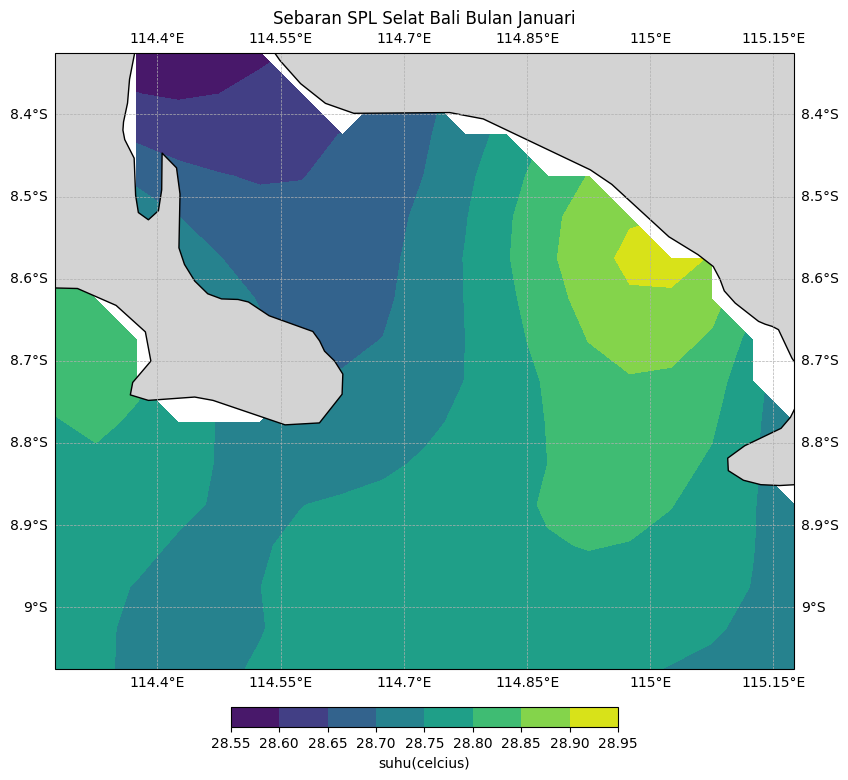

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=0), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Januari')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

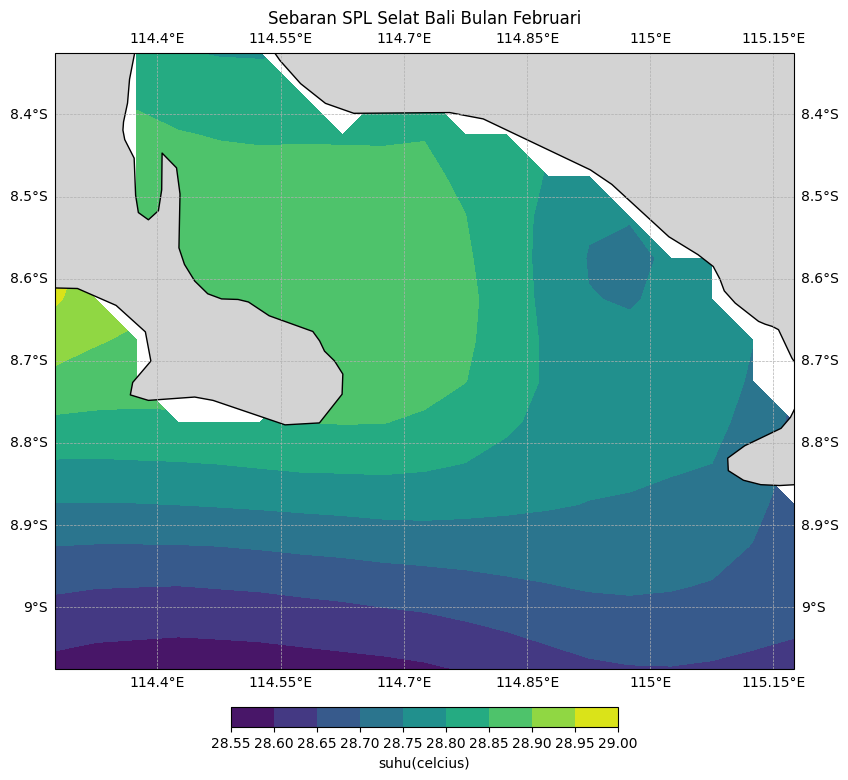

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=1), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Februari')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

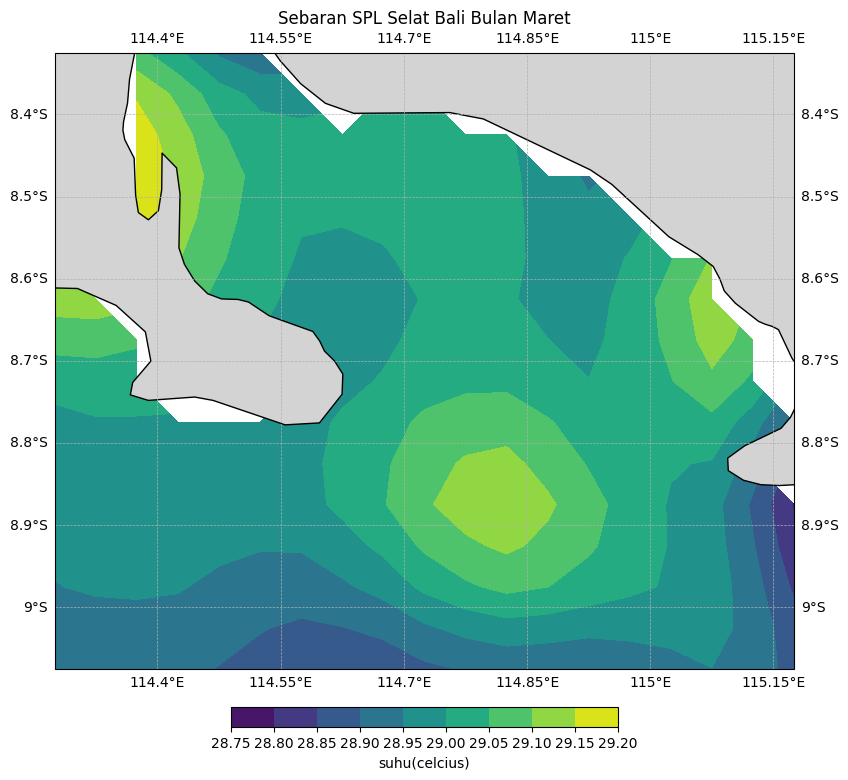

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=2), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Maret')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

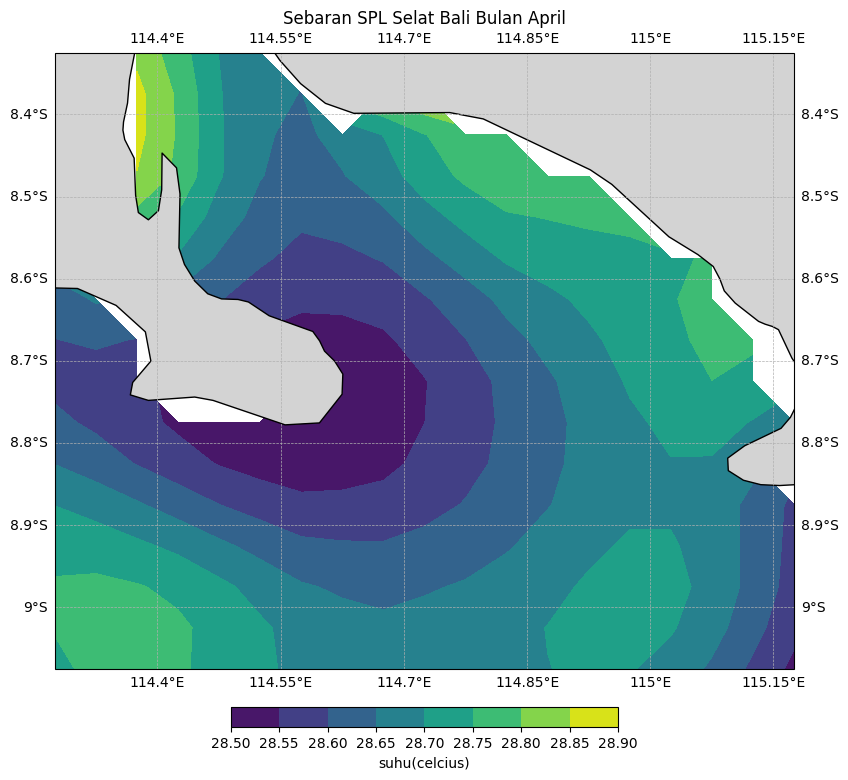

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=3), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan April')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

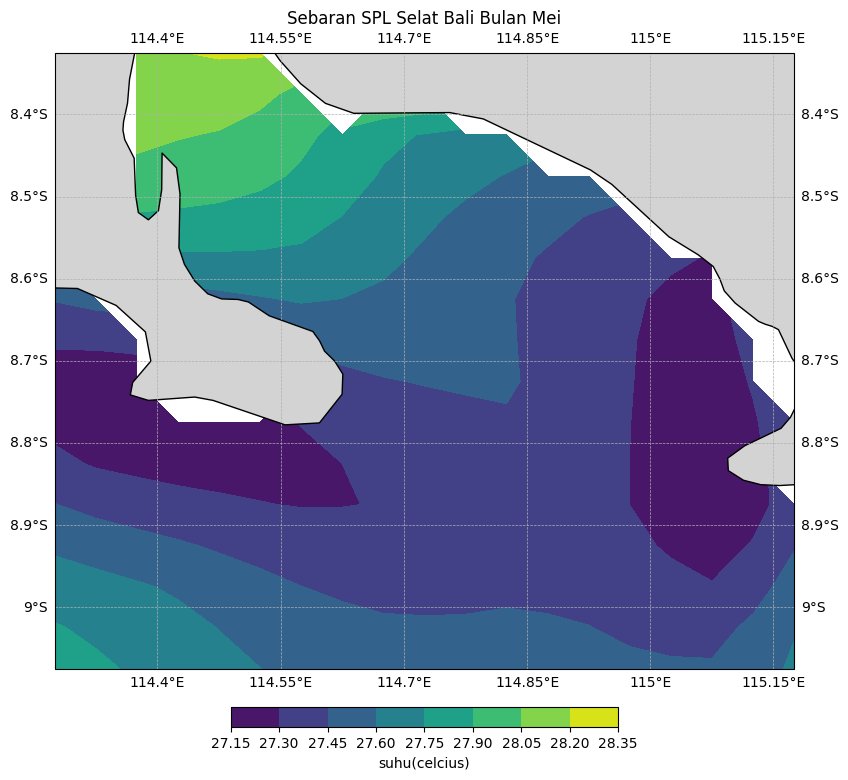

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=4), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Mei')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

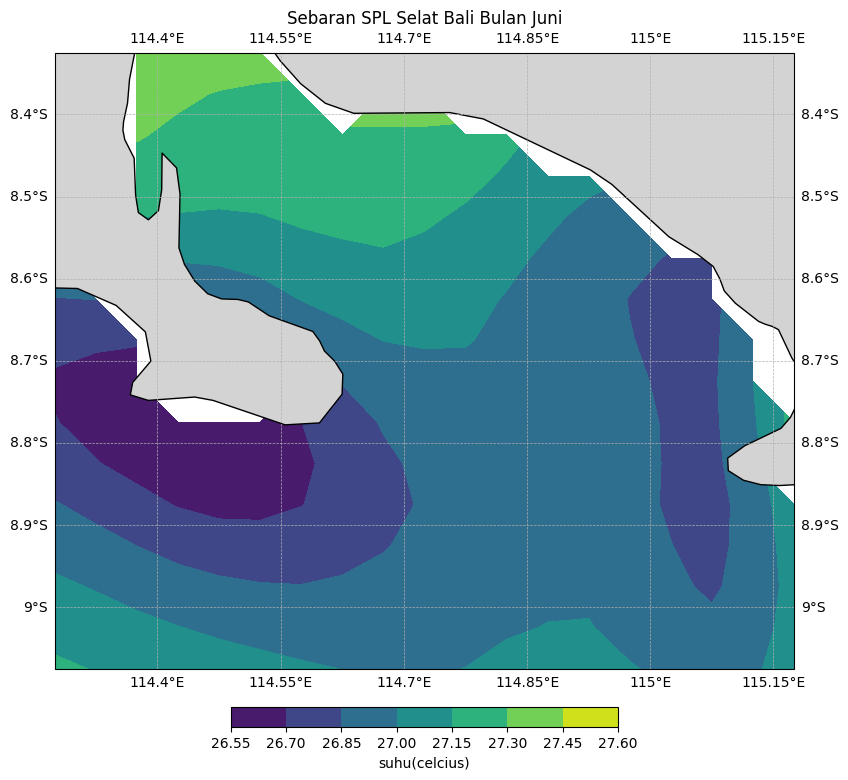

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=5), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Juni')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

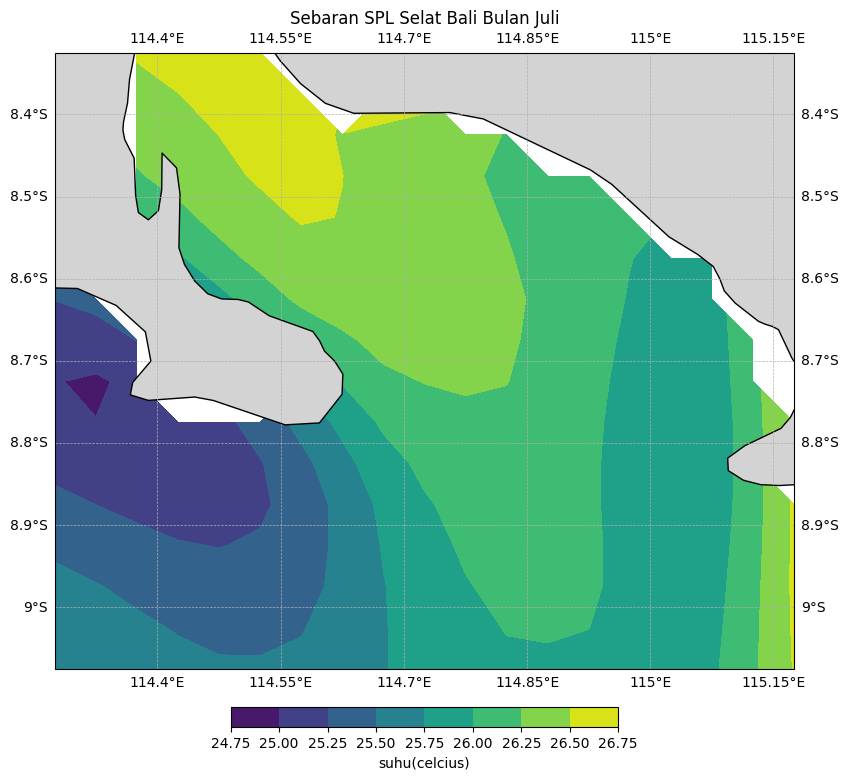

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=6), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Juli')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

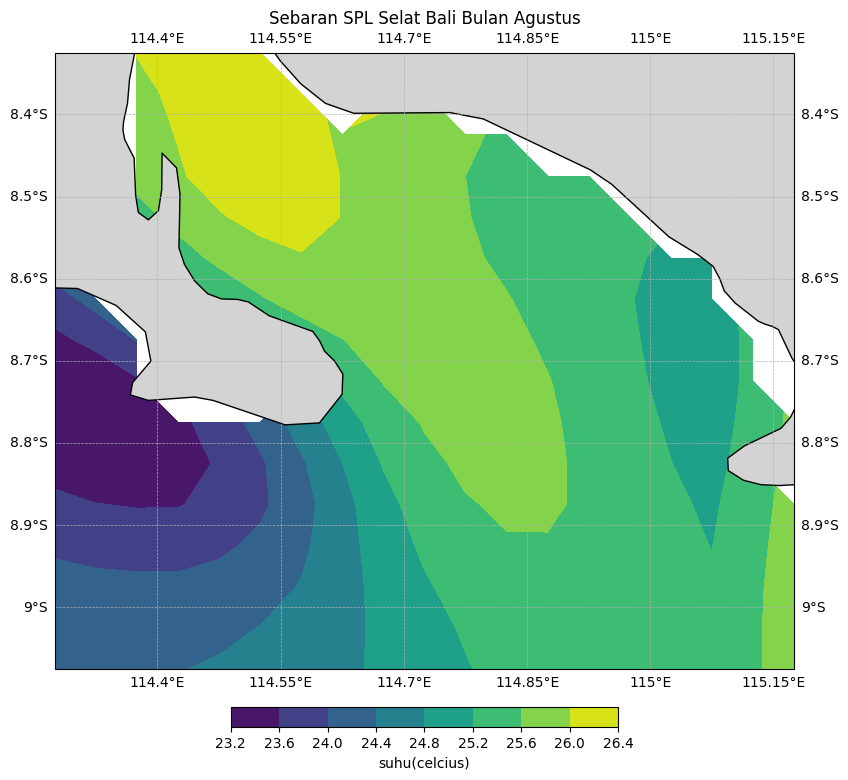

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=7), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Agustus')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

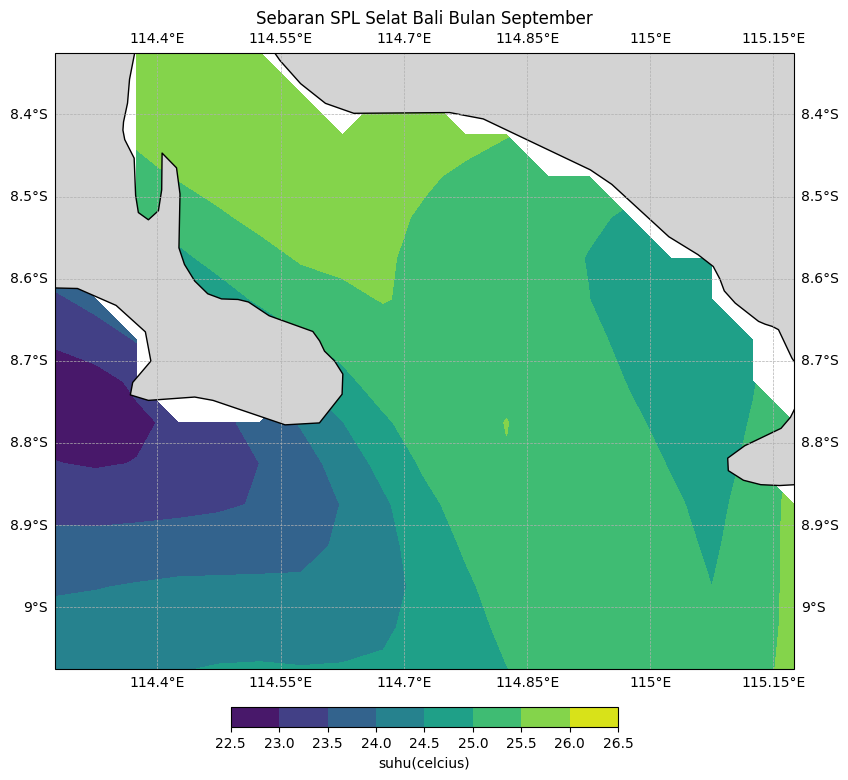

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=8), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan September')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

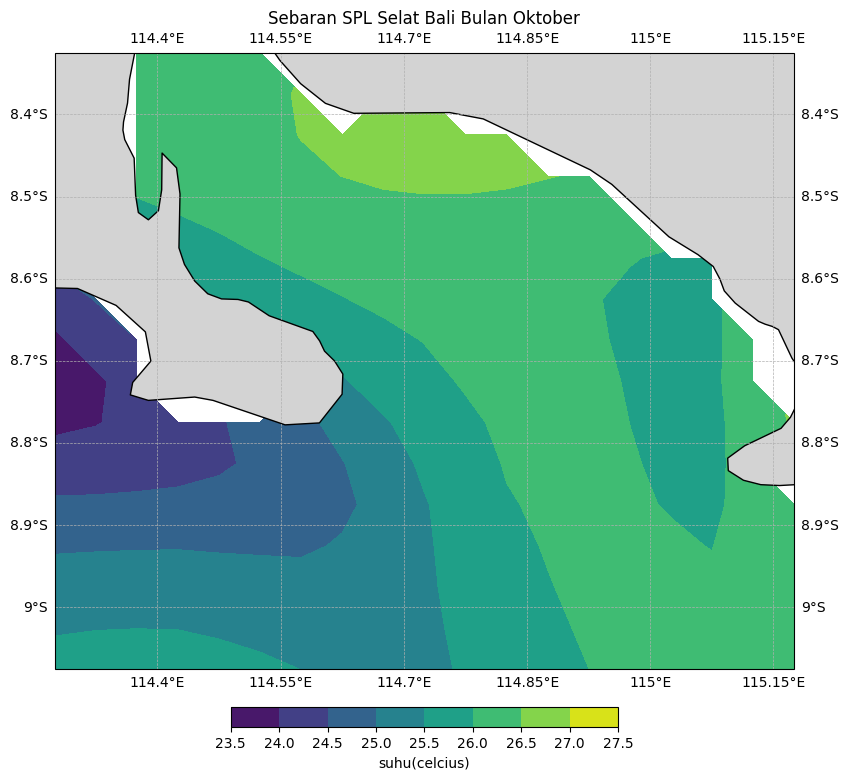

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=9), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Oktober')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

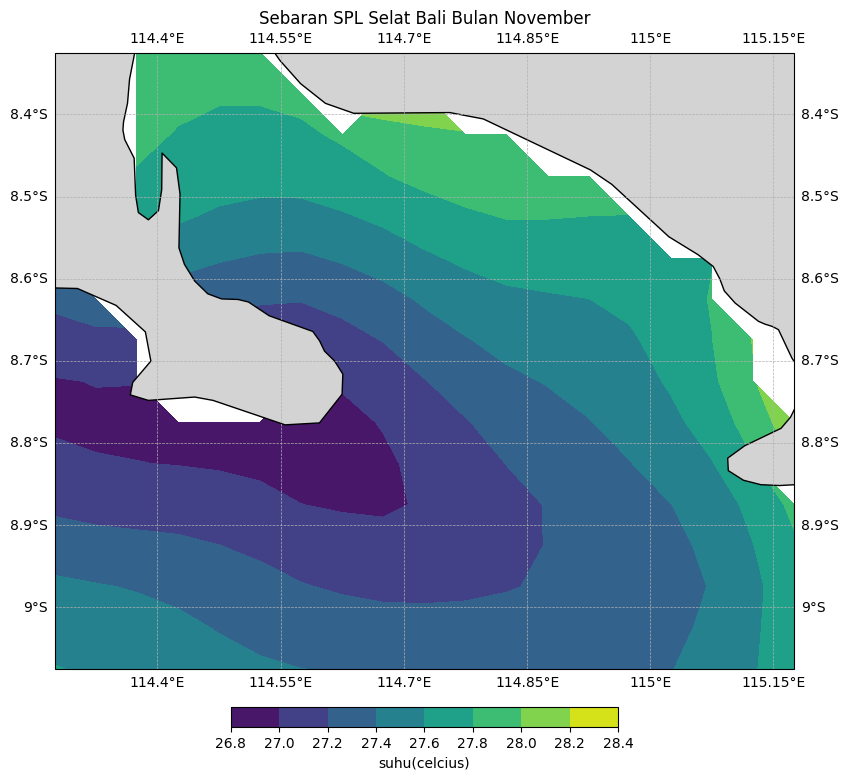

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=10), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan November')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

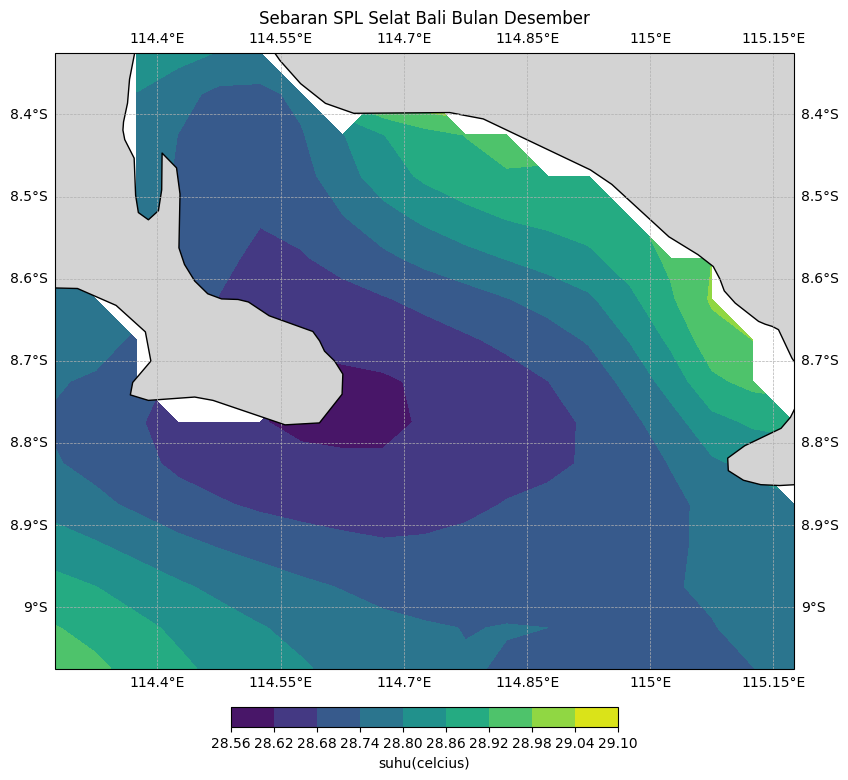

In [ ]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #inisialisasi canvas
ax.set () #set boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=11), transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL Selat Bali Bulan Desember')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

# 12 Bulan Kecil SPL

In [ ]:
print(dset_bulan_sst_celcius.max())
print(dset_bulan_sst_celcius.min())

<xarray.Dataset>
Dimensions:       ()
Data variables:
    analysed_sst  float32 29.19
<xarray.Dataset>
Dimensions:       ()
Data variables:
    analysed_sst  float32 22.79


In [ ]:
font = {'family': 'calibri',
        'color': 'black',
        'weight': 'normal',
        'size': '10'}

In [ ]:
import numpy as np

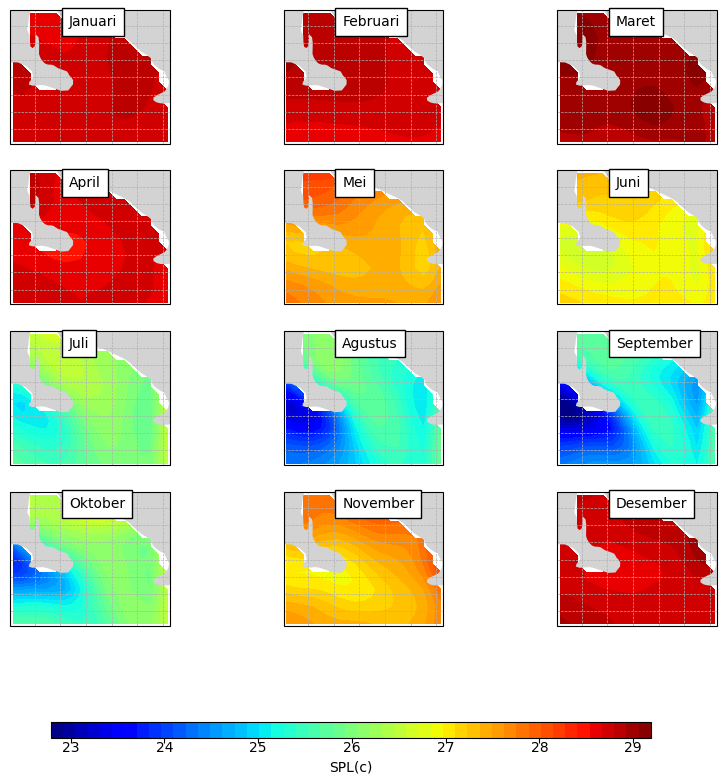

In [ ]:
color_levels = np.linspace(start=22.79, stop=29.19)
color_map = 'jet'

#SPL Januari
fig, ax = plt.subplots(nrows=4, ncols=3, figsize = (10,8), subplot_kw={'projection':ccrs.PlateCarree()})
ax[0,0].coastlines
ax[0,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,0].text(114.6, -8.4, 'Januari', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=0), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[0,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Februari
ax[0,1].coastlines
ax[0,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,1].text(114.6, -8.4, 'Februari', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=1), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[0,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Maret
ax[0,2].coastlines
ax[0,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,2].text(114.6, -8.4, 'Maret', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=2), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[0,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL April
ax[1,0].coastlines
ax[1,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,0].text(114.6, -8.4, 'April', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=3), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[1,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Mei
ax[1,1].coastlines
ax[1,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,1].text(114.6, -8.4, 'Mei', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=4), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[1,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Juni
ax[1,2].coastlines
ax[1,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,2].text(114.6, -8.4, 'Juni', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=5), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[1,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Juli
ax[2,0].coastlines
ax[2,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,0].text(114.6, -8.4, 'Juli', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=6), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[2,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Agustus
ax[2,1].coastlines
ax[2,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,1].text(114.6, -8.4, 'Agustus', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=7), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[2,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL September
ax[2,2].coastlines
ax[2,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,2].text(114.6, -8.4, 'September', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=8), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[2,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Oktober
ax[3,0].coastlines
ax[3,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,0].text(114.6, -8.4, 'Oktober', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=9), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[3,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL November
ax[3,1].coastlines
ax[3,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,1].text(114.6, -8.4, 'November', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=10), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[3,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Desember
ax[3,2].coastlines
ax[3,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,2].text(114.6, -8.4, 'Desember', fontdict=font,
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=11), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
gridlines = ax[3,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

cax = fig.add_axes([0.2, -0.03, 0.6, 0.02])
cbar = fig.colorbar(color, cax=cax, orientation='horizontal', shrink=0.6, pad=0.8)

cbar.ax.set_xlabel('SPL(c)', fontdict=font)
cbar.ax.set_xticks(ticks=[23, 24, 25, 26, 27, 28, 29])
cbar.ax.set_xticklabels([23, 24, 25, 26, 27, 28, 29], rotation='horizontal', va='center', fontdict=font)
plt.show()

#SEBARAN KLOROFIL-A

In [ ]:
pathc1 = '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023'

In [ ]:
#import modules
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
import os
bulcho_path = [os.path.join(root, file)for root, dirs, files in os.walk ('/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023')for file in files]
bulcho_path

['/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230901_20230930.L3m.MO.CHL.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230501_20230531.L3m.MO.CHL.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20231101_20231130.L3m.MO.CHL.NRT.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230701_20230731.L3m.MO.CHL.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230101_20230131.L3m.MO.CHL.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.x_chlor_a.nc',
 '/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20231001_20231031.L3m.MO.CHL.NRT.x_chlor_a.nc',
 '/content/d

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

In [ ]:
liftime = pd.date_range(start=datetime(2023,1,1), end=datetime(2023,12,31), freq='1M')
len(bulcho_path)== len(liftime)

True

In [ ]:
didset = {}
liftime = pd.date_range(start=datetime(2023,1,1), end=datetime(2023,12,31), freq='1M')
for i, path in enumerate(bulcho_path):
  print(f'{i}-{path}')
  ds=xr.open_dataset(path)\
  .assign_coords({'time':liftime[i]})\
  .set_coords('time')\
  .sel (lon=slice(114.256714, 115.190552), lat=slice(-8.304183, -9.086529))
  didset[i] = ds
  didset

0-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230901_20230930.L3m.MO.CHL.x_chlor_a.nc
1-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230501_20230531.L3m.MO.CHL.x_chlor_a.nc
2-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20231101_20231130.L3m.MO.CHL.NRT.x_chlor_a.nc
3-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230701_20230731.L3m.MO.CHL.x_chlor_a.nc
4-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230101_20230131.L3m.MO.CHL.x_chlor_a.nc
5-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.x_chlor_a.nc
6-/content/drive/MyDrive/Praktikum APK Inderaja/Data Klorofil-a 2023/requested_files/AQUA_MODIS.20231001_20231031.L3m.MO.CHL.NRT.x_chlor_a.nc
7-/content/drive/MyDrive/P

In [ ]:
display (didset)

{0: <xarray.Dataset>
 Dimensions:  (lat: 19, lon: 22, rgb: 3, eightbitcolor: 256)
 Coordinates:
   * lat      (lat) float32 -8.325 -8.366 -8.407 -8.448 ... -8.984 -9.025 -9.066
   * lon      (lon) float32 114.3 114.3 114.4 114.4 ... 115.0 115.1 115.1 115.2
     time     datetime64[ns] 2023-01-31
 Dimensions without coordinates: rgb, eightbitcolor
 Data variables:
     chlor_a  (lat, lon) float32 ...
     palette  (rgb, eightbitcolor) uint8 ...
 Attributes: (12/61)
     product_name:                     AQUA_MODIS.20230901_20230930.L3m.MO.CHL...
     instrument:                       MODIS
     title:                            MODISA Level-3 Equidistant Cylindrical ...
     project:                          Ocean Biology Processing Group (NASA/GS...
     platform:                         Aqua
     source:                           satellite observations from MODIS-Aqua
     ...                               ...
     processing_level:                 L3 Mapped
     cdm_data_type:       

In [ ]:
dsconcat = xr.concat (didset.values(), dim ='time')
dsconcat

<xarray.Dataset>
Dimensions:  (time: 12, lat: 19, lon: 22, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 -8.325 -8.366 -8.407 -8.448 ... -8.984 -9.025 -9.066
  * lon      (lon) float32 114.3 114.3 114.4 114.4 ... 115.0 115.1 115.1 115.2
  * time     (time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (time, lat, lon) float32 nan nan 1.931 ... 0.6796 0.6292 0.5254
    palette  (time, rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20230901_20230930.L3m.MO.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        349
    data_minimum:                     0.24270219
    data_maximum:                     22.84989

In [ ]:
dbul_cho = dsconcat.chlor_a.isel(time=slice(0,12))
dbul_cho

<xarray.DataArray 'chlor_a' (time: 12, lat: 19, lon: 22)>
array([[[       nan,        nan, 1.9307266 , ...,        nan,
                nan,        nan],
        [       nan, 2.839219  , 3.0286112 , ...,        nan,
                nan,        nan],
        [       nan, 3.9935865 , 2.7056181 , ...,        nan,
                nan,        nan],
        ...,
        [1.9746097 , 1.7844526 , 1.5630797 , ..., 1.013136  ,
         0.9024144 , 0.51973003],
        [1.8163382 , 1.6843158 , 1.5336188 , ..., 1.1066203 ,
         0.9516077 , 0.5065297 ],
        [1.9059321 , 1.8115249 , 1.6022362 , ..., 1.0667036 ,
         0.9221302 , 0.4893712 ]],

       [[       nan,        nan, 4.312446  , ...,        nan,
                nan,        nan],
        [       nan, 6.284042  , 4.783867  , ...,        nan,
                nan,        nan],
        [       nan, 5.705382  , 5.118944  , ...,        nan,
                nan,        nan],
...
        [0.18576016, 0.18543889, 0.18385564, ..., 0.21538511,
         0.2999786 , 0.3323859 ],
        [0.16933754, 0.16875774, 0.17318653, ..., 0.2291887 ,
         0.29851872, 0.32983986],
        [0.16285324, 0.16533269, 0.1670874 , ..., 0.24634862,
         0.3050335 , 0.31554022]],

       [[       nan,        nan, 3.083235  , ...,        nan,
                nan,        nan],
        [       nan, 3.3658423 , 3.2595563 , ...,        nan,
                nan,        nan],
        [       nan, 3.918512  , 3.4141493 , ...,        nan,
                nan,        nan],
        ...,
        [0.99217534, 1.0825943 , 1.1623081 , ..., 0.778608  ,
         0.7991494 , 0.70743716],
        [0.6933189 , 0.85927665, 0.98882896, ..., 0.6735232 ,
         0.63276386, 0.54917586],
        [0.8073447 , 0.86339575, 0.93848294, ..., 0.679595  ,
         0.6292244 , 0.52540845]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -8.325 -8.366 -8.407 -8.448 ... -8.984 -9.025 -9.066
  * lon      (lon) float32 114.3 114.3 114.4 114.4 ... 115.0 115.1 115.1 115.2
  * time     (time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [ ]:
from datetime import datetime,timedelta
import pandas as pd

limonth = pd.date_range(start="2023-01-01", periods=12, freq='1M')
list_month = [m.strftime('%B') for m in limonth]

list_month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
pip install cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy. feature as cfeature

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


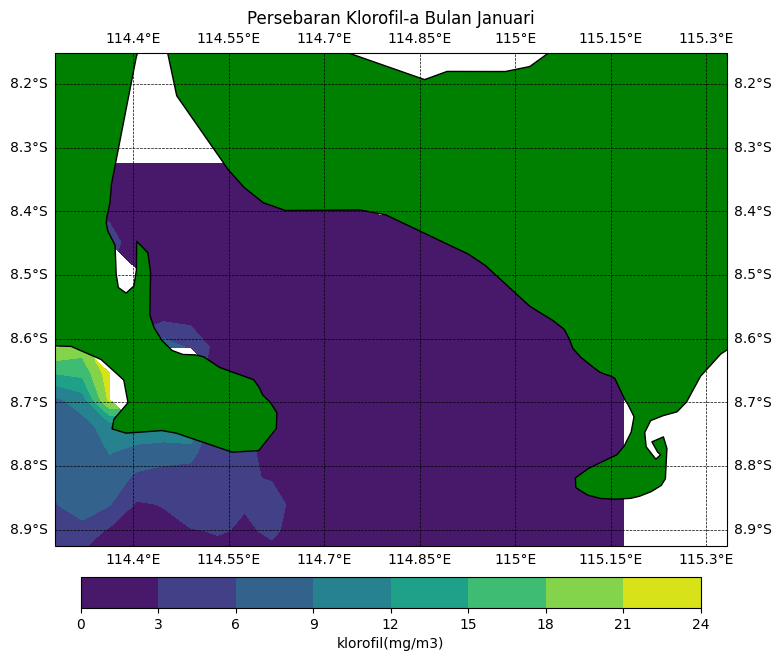

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(16,8)) #Inisialisasi Canvas
ax.set_extent([115.331726, 114.277039,-8.925172,-8.151540]) # Set Boundary dari koordinat
ax.coastlines() # garis pantai
ax.add_feature(cfeature.BORDERS,linewidth=3, color='black') # Boder dengan cfeature
ax.add_feature(cfeature.LAND, facecolor='green', zorder=1) # Tutupan daratan cfeature

gridlines=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--', color='black')
gridlines.xlabels_top=False
gridlines.ylabels_right=False


plot_variable = ax.contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=0), transform=ccrs.PlateCarree(), zorder=0, cmap='viridis')
plt.title('Persebaran Klorofil-a Bulan Januari')
plt.colorbar(plot_variable, shrink=0.5, label='klorofil(mg/m3)', orientation='horizontal', pad=0.05)
plt.show()

In [ ]:
import numpy as np

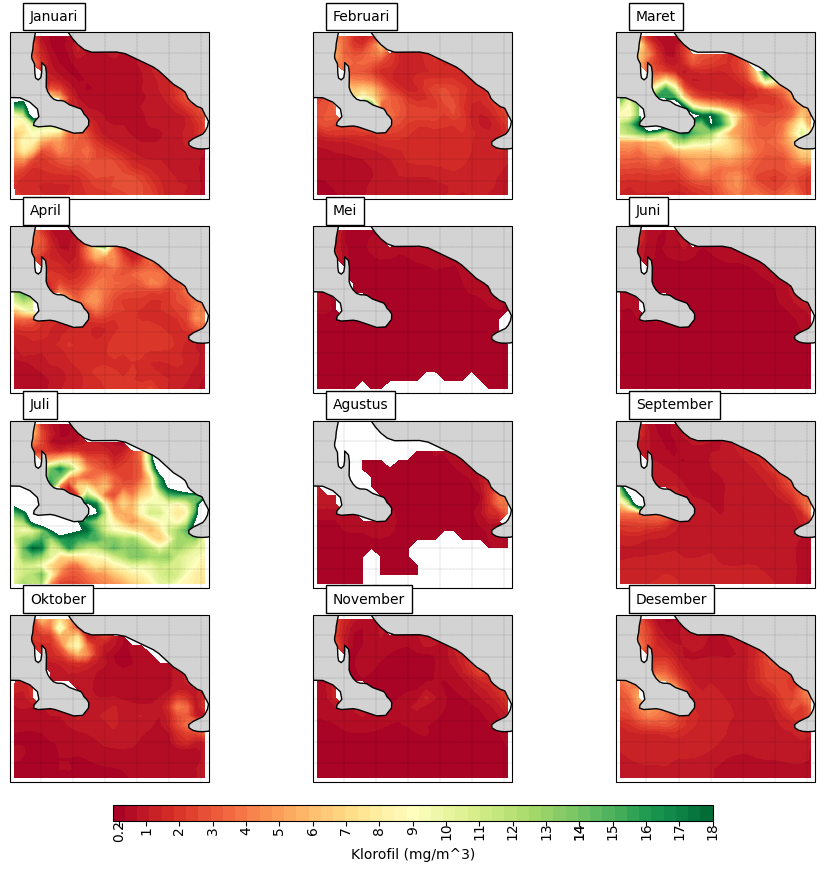

In [ ]:
color_levels = np.linspace(start=0, stop=18)
color_map = 'RdYlGn'

fig, ax = plt.subplots(nrows=4, ncols=3, figsize = (10,8), subplot_kw={'projection':ccrs.PlateCarree()})

ax[0,0].coastlines()
ax[0,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[0,0].text(114.35, -8.25, 'Januari',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,0].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=0),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[0,0].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[0,1].coastlines()
ax[0,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[0,1].text(114.35, -8.25, 'Februari',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[0,1].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=1),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[0,1].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[0,2].coastlines()
ax[0,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[0,2].text(114.35, -8.25, 'Maret',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[0,2].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=2),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[0,2].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[1,0].coastlines()
ax[1,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[1,0].text(114.35, -8.25, 'April',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[1,0].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=3),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[1,0].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[1,1].coastlines()
ax[1,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[1,1].text(114.35, -8.25, 'Mei',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[1,1].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=4),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[1,1].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[1,2].coastlines()
ax[1,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[1,2].text(114.35, -8.25, 'Juni',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[1,2].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=5),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[1,2].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[2,0].coastlines()
ax[2,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[2,0].text(114.35, -8.25, 'Juli',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[2,0].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=6),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[2,0].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[2,1].coastlines()
ax[2,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[2,1].text(114.35, -8.25, 'Agustus',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[2,1].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=7),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[2,1].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[2,2].coastlines()
ax[2,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[2,2].text(114.35, -8.25, 'September',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[2,2].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=8),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[2,2].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[3,0].coastlines()
ax[3,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[3,0].text(114.35, -8.25, 'Oktober',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[3,0].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=9),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[3,0].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[3,1].coastlines()
ax[3,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[3,1].text(114.35, -8.25, 'November',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[3,1].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=10),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[3,1].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

ax[3,2].coastlines()
ax[3,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax[3,2].text(114.35, -8.25, 'Desember',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
ax[3,2].contourf(dsconcat.lon, dsconcat.lat, dbul_cho.isel(time=11),  transform=ccrs.PlateCarree(), zorder=0, cmap=color_map, levels=color_levels)
gridlines=ax[3,2].gridlines(crs=ccrs.PlateCarree(), alpha=0.5, linewidth=0.2, linestyle='--', color='black')
#gridlines.xlabels_top=False
#gridlines.ylabels_right=False

fig.tight_layout(h_pad=0.5, w_pad=0.5)
#plt.suptitle("Pola Curah Hujan Laut Banda Musim Barat dan Timur Periode El Nino dan La Nina", fontdict=font)

cax = fig.add_axes([0.2, -0.03, 0.6, 0.02])
cbar = fig.colorbar(color, cax=cax, orientation='horizontal', shrink=0.6, pad=0.8)

cbar.ax.set_xlabel('Klorofil (mg/m^3)')
cbar.ax.set_xticks(ticks=[ 0.2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 17, 18])
cbar.ax.set_xticklabels([ 0.2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 17, 18], rotation='horizontal', va='center')
plt.xticks(rotation=90)

plt.show()

#SEBARAN SPL DAN ARUS

In [ ]:
patharus = '/content/drive/MyDrive/Praktikum APK Inderaja/Arus bulanan copernicus selat bali 2023/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_1714578492060.nc'

In [ ]:
dset_arus = xr.open_dataset(patharus)
dset_arus

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 10, longitude: 11, time: 8737)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -9.083 -9.0 -8.917 ... -8.5 -8.417 -8.333
  * longitude  (longitude) float32 114.3 114.4 114.5 114.6 ... 115.0 115.1 115.2
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31
Data variables:
    uo         (time, depth, latitude, longitude) float32 ...
    utotal     (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    contact:           servicedesk.cmems@mercator-ocean.eu
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       MERCATOR OCEAN
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    source:            MERCATOR GLO12, mfwamglo, FES2014
    subset:datasetId:  cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_202211
    subset:date:       2024-05-01T15:48:12.069Z
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             hourly mean merged surface currents from oceanic circu...

In [ ]:
pip install pandas

In [ ]:
from pandas import Series
from pandas import date_range
from pandas import DataFrame

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

In [ ]:
pip install cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt

In [ ]:
limonth = pd.date_range(start="2023-01-01", periods=12, freq='1M')
display (limonth)

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

limonth = pd.date_range(start="2023-01-01", periods=12, freq='1M')
list_month = [m.strftime('%B') for m in limonth]

list_month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
dset_bulanar = dset_arus.groupby('time.month').mean()
dset_bulanar

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 10, longitude: 11, month: 12)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -9.083 -9.0 -8.917 ... -8.5 -8.417 -8.333
  * longitude  (longitude) float32 114.3 114.4 114.5 114.6 ... 115.0 115.1 115.2
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    uo         (month, depth, latitude, longitude) float32 0.3283 0.3437 ... nan
    utotal     (month, depth, latitude, longitude) float32 0.3976 0.4128 ... nan
    vo         (month, depth, latitude, longitude) float32 0.02206 ... nan
    vtotal     (month, depth, latitude, longitude) float32 0.04124 ... nan
Attributes:
    Conventions:       CF-1.11
    contact:           servicedesk.cmems@mercator-ocean.eu
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       MERCATOR OCEAN
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    source:            MERCATOR GLO12, mfwamglo, FES2014
    subset:datasetId:  cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_202211
    subset:date:       2024-05-01T15:48:12.069Z
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             hourly mean merged surface currents from oceanic circu...

In [ ]:
data_arus = np.sqrt(np.square(dset_bulanar.uo) + np.square(dset_bulanar.vo))
data_arus

<xarray.DataArray (month: 12, depth: 1, latitude: 10, longitude: 11)>
array([[[[0.3290271 , 0.34406364, 0.3598172 , ..., 0.44944873,
          0.4443113 , 0.4368963 ],
         [0.31573   , 0.33177376, 0.34077796, ..., 0.41530043,
          0.42134368, 0.4365376 ],
         [0.3303551 , 0.3460639 , 0.3357582 , ..., 0.30776837,
          0.31566662, 0.36497337],
         ...,
         [       nan, 0.08123611, 0.1440235 , ...,        nan,
                 nan,        nan],
         [       nan, 0.37218684, 0.14872898, ...,        nan,
                 nan,        nan],
         [       nan, 0.41956562, 0.24744289, ...,        nan,
                 nan,        nan]]],


       [[[0.4141605 , 0.4480023 , 0.4803101 , ..., 0.51949596,
          0.5223356 , 0.53525335],
         [0.47239193, 0.49709097, 0.5184558 , ..., 0.5136472 ,
          0.53370184, 0.57830036],
         [0.512341  , 0.5203878 , 0.519265  , ..., 0.49623203,
...
                 nan,        nan],
         [       nan, 0.64725286, 0.77858204, ...,        nan,
                 nan,        nan],
         [       nan, 1.0024781 , 0.8840416 , ...,        nan,
                 nan,        nan]]],


       [[[0.12849325, 0.11478099, 0.12422271, ..., 0.14022264,
          0.21761522, 0.2464942 ],
         [0.09900719, 0.0914411 , 0.10545002, ..., 0.16867591,
          0.24997355, 0.21606296],
         [0.09187268, 0.09560201, 0.10196261, ..., 0.21453135,
          0.24428752, 0.25259224],
         ...,
         [       nan, 0.5652632 , 0.6488189 , ...,        nan,
                 nan,        nan],
         [       nan, 0.62051034, 0.6403632 , ...,        nan,
                 nan,        nan],
         [       nan, 0.9540562 , 0.79946107, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -9.083 -9.0 -8.917 ... -8.5 -8.417 -8.333
  * longitude  (longitude) float32 114.3 114.4 114.5 114.6 ... 115.0 115.1 115.2
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'transfrom'
  result = super().contourf(*args, **kwargs)


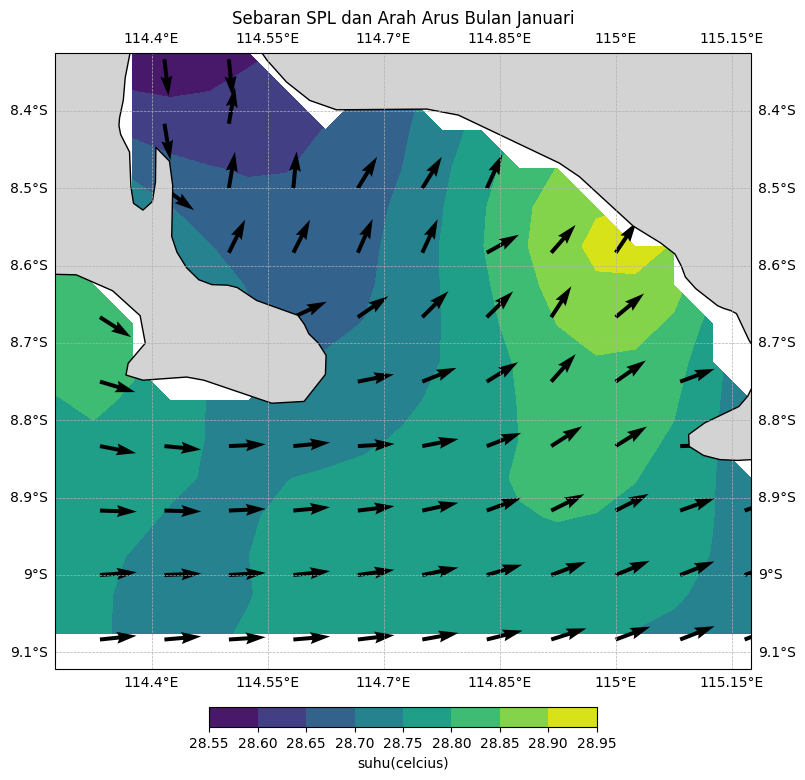

In [ ]:
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10)) #Inisialisasi Canvas
ax.set () # Set Boundary
ax.coastlines()
ax.add_feature(cfeature.BORDERS,linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)

gridlines=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, linestyle='--')
gridlines.xlabels_top = False
gridlines.ylabels_right = False

mag1_arus = np.sqrt(np.square(dset_bulanar.utotal.isel(month=0, depth=0)) + np.square(dset_bulanar.vtotal.isel(month=0, depth=0)))

plot_variable = ax.contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan.isel(month=0), transfrom=ccrs.PlateCarree(), zorder=0)
ax.quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=0, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=0, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
plt.title('Sebaran SPL dan Arah Arus Bulan Januari')
plt.colorbar(plot_variable, shrink=0.5, label='suhu(celcius)', orientation='horizontal', pad=0.05)
plt.show()

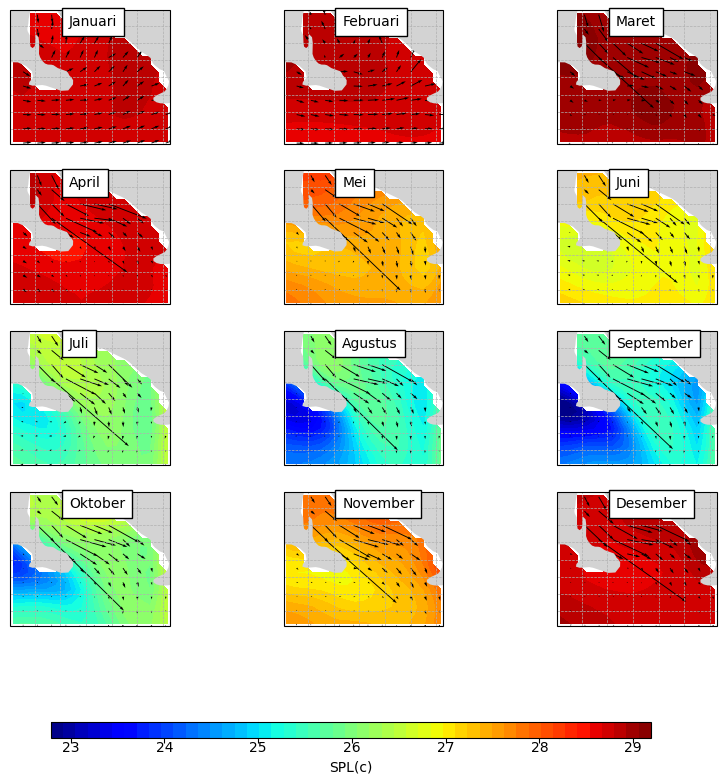

In [ ]:
color_levels = np.linspace(start=22.79, stop=29.19)
color_map = 'jet'

#SPL Januari
fig, ax = plt.subplots(nrows=4, ncols=3, figsize = (10,8), subplot_kw={'projection':ccrs.PlateCarree()})
ax[0,0].coastlines
ax[0,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,0].text(114.6, -8.4, 'Januari',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=0), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[0,0].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=0, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=0, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[0,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Februari
ax[0,1].coastlines
ax[0,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,1].text(114.6, -8.4, 'Februari',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=1), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[0,1].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=1, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=1, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[0,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Maret
ax[0,2].coastlines
ax[0,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[0,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[0,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[0,2].text(114.6, -8.4, 'Maret',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[0,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=2), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[0,2].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=2, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=2, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[0,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL April
ax[1,0].coastlines
ax[1,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,0].text(114.6, -8.4, 'April',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=3), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[1,0].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=3, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=3, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[1,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Mei
ax[1,1].coastlines
ax[1,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,1].text(114.6, -8.4, 'Mei',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=4), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[1,1].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=4, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=4, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[1,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Juni
ax[1,2].coastlines
ax[1,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[1,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[1,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[1,2].text(114.6, -8.4, 'Juni',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[1,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=5), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[1,2].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=5, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=5, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[1,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Juli
ax[2,0].coastlines
ax[2,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,0].text(114.6, -8.4, 'Juli',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=6), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[2,0].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=6, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=6, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[2,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Agustus
ax[2,1].coastlines
ax[2,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,1].text(114.6, -8.4, 'Agustus',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=7), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[2,1].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=7, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=7, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[2,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL September
ax[2,2].coastlines
ax[2,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[2,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[2,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[2,2].text(114.6, -8.4, 'September',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[2,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=8), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[2,2].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=8, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=8, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[2,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Oktober
ax[3,0].coastlines
ax[3,0].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,0].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,0].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,0].text(114.6, -8.4, 'Oktober',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,0].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=9), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[3,0].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=9, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=9, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[3,0].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL November
ax[3,1].coastlines
ax[3,1].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,1].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,1].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,1].text(114.6, -8.4, 'November',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,1].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=10), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[3,1].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=10, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=10, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[3,1].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

#SPL Desember
ax[3,2].coastlines
ax[3,2].set_extent([115.190552, 114.256714, -9.086529, -8.304183])
ax[3,2].add_feature(cfeature.BORDERS, linewidth=1)
ax[3,2].add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax[3,2].text(114.6, -8.4, 'Desember',
             bbox=dict(facecolor='white', edgecolor='black', pad=5))
color = ax[3,2].contourf(dset_bulan_sst.longitude, dset_bulan_sst.latitude, dset_bulan_sst_celcius.analysed_sst.isel(month=11), transform=ccrs.PlateCarree(), zorder=0, levels= color_levels, cmap=color_map)
ax[3,2].quiver(dset_bulanar.longitude, dset_bulanar.latitude, dset_bulanar.utotal.isel(month=11, depth=0)/mag1_arus, dset_bulanar.vtotal.isel(month=11, depth=0)/mag1_arus, transform=ccrs.PlateCarree(), zorder=0)
gridlines = ax[3,2].gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, linestyle='--')

cax = fig.add_axes([0.2, -0.03, 0.6, 0.02])
cbar = fig.colorbar(color, cax=cax, orientation='horizontal', shrink=0.6, pad=0.8)

cbar.ax.set_xlabel('SPL(c)')
cbar.ax.set_xticks(ticks=[23, 24, 25, 26, 27, 28, 29])
cbar.ax.set_xticklabels([23, 24, 25, 26, 27, 28, 29], rotation='horizontal', va='center')
plt.show()

# KORELASI KLOROFIL-A DAN SST

In [ ]:
dsconcat_jandes = dsconcat.chlor_a.isel(time=slice(0,12))
dsconcat_jandes_time_average = dsconcat.chlor_a.mean(dim='time')
dsconcat_jandes_spatial_average = dsconcat.chlor_a.mean(dim=['lat', 'lon'])

dsconcat_jandes_spatial_average

<xarray.DataArray 'chlor_a' (time: 12)>
array([ 2.20026   ,  1.9121034 ,  5.3988957 ,  2.4365315 ,  0.24096277,
        0.31609726, 10.636084  ,  0.40529218,  1.5308013 ,  1.1167642 ,
        0.52144516,  1.5191839 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31

In [ ]:
dsel = dset_bulan.isel(month=slice(0,12))
dsel_time_average = dset_bulan.mean(dim='month')
dsel_spatial_average_sst = dset_bulan.mean(dim=['latitude', 'longitude'])
dsel_spatial_average_sst

<xarray.DataArray 'analysed_sst' (month: 12)>
array([28.754957, 28.769434, 29.001541, 28.663979, 27.507181, 26.963665,
       25.940487, 25.136065, 24.829296, 25.735498, 27.42279 , 28.754646],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
tanggal = date_range(start='2023-01-31', periods=12, freq='1M')
print (tanggal)

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')


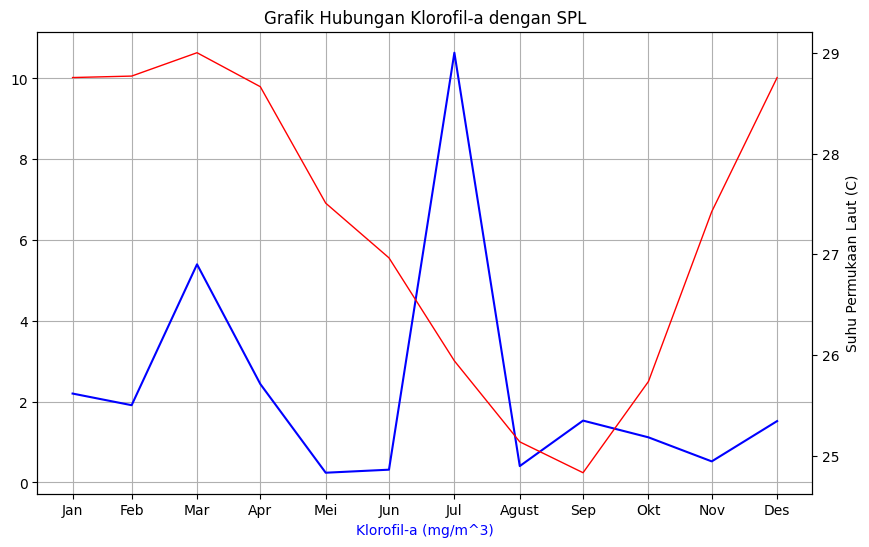

In [ ]:
fig, ax1 = plt. subplots(figsize=(10,6))
fig.patch.set_facecolor('white')

ax2 = ax1.twinx()
ax1.plot(tanggal, dsconcat_jandes_spatial_average, color='blue')
ax2.plot(tanggal, dsel_spatial_average_sst, color='red', linewidth=1)

ax1.set(title='Grafik Hubungan Klorofil-a dengan SPL')

my_xticks=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agust', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(tanggal, my_xticks)

ax1.set_xlabel('Klorofil-a (mg/m^3)', color='b')
ax2.set_ylabel('Suhu Permukaan Laut (C)', color='black')

#ax.set_xticks(ticks=[1,2,3])
#ax.set_xtickslabels([1,2,3])

ax1.grid()

# KORELASI SPL DAN ARUS

In [ ]:
import numpy as np

resultarus = np.sqrt(dset_bulanar.utotal*2+dset_bulanar.vtotal*2)
resultarus

/usr/local/lib/python3.10/dist-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray (month: 12, depth: 1, latitude: 10, longitude: 11)>
array([[[[0.9368627 , 0.946518  , 0.9546964 , ..., 1.1521822 ,
          1.1498901 , 1.1400104 ],
         [0.90691745, 0.9115471 , 0.9302263 , ..., 1.1211197 ,
          1.1237427 , 1.1374918 ],
         [0.87741184, 0.89600134, 0.91718584, ..., 0.99811596,
          0.98315686, 1.0405871 ],
         ...,
         [       nan, 0.19010015, 0.5904669 , ...,        nan,
                 nan,        nan],
         [       nan,        nan, 0.59951615, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]],


       [[[0.99786294, 1.0404798 , 1.0873618 , ..., 1.1595583 ,
          1.1491611 , 1.1630921 ],
         [1.0126587 , 1.0318784 , 1.0647707 , ..., 1.1550554 ,
          1.1395938 , 1.188371  ],
         [0.9597163 , 0.9638458 , 1.0112859 , ..., 1.1294233 ,
...
                 nan,        nan],
         [       nan, 0.4347196 , 0.43498158, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]],


       [[[0.5746374 , 0.4904327 , 0.43478888, ..., 0.29075712,
                 nan,        nan],
         [0.52018046, 0.4269013 , 0.4357131 , ..., 0.13410617,
                 nan,        nan],
         [0.47284245, 0.4534324 , 0.47589475, ...,        nan,
                 nan,        nan],
         ...,
         [       nan, 0.2153961 , 0.2018197 , ...,        nan,
                 nan,        nan],
         [       nan,        nan, 0.38518798, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -9.083 -9.0 -8.917 ... -8.5 -8.417 -8.333
  * longitude  (longitude) float32 114.3 114.4 114.5 114.6 ... 115.0 115.1 115.2
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
resultarus = resultarus.isel(month=slice(0,12))
resultarus_time_average = resultarus.mean (dim='month')
resultarus_time_average_spatial = resultarus.mean (dim=['longitude', 'latitude'])


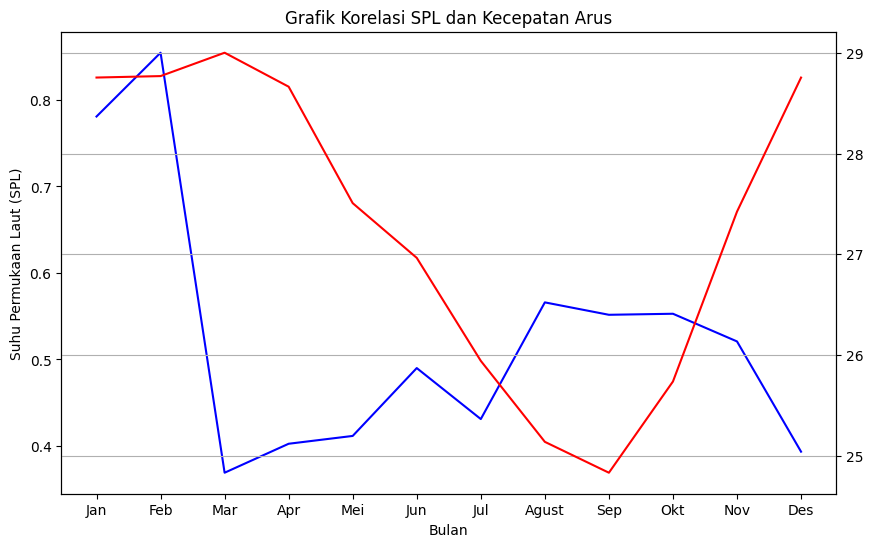

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
ax2 = ax1.twinx()
ax1.plot(list_month, resultarus_time_average_spatial, color='blue')
ax2.plot(list_month, dsel_spatial_average_sst, color='red')

my_xticks=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agust', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(list_month, my_xticks)
ax1.set_title('Grafik Korelasi SPL dan Kecepatan Arus')
ax1.set_xlabel('Bulan', color='black')
ax1.set_ylabel('Kecepatan Arus (m/s)', color='b')
ax1.set_ylabel('Suhu Permukaan Laut (SPL)', color='black')

plt.grid()
plt.show()